# Random Forest

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [100]:
df = pd.read_csv('./data/cleaned_engineered.csv')
df.drop(columns='Unnamed: 0', inplace=True)
#0 is espresso, 1 is beer

# TREES

In [133]:
numeric = df.dtypes[df.dtypes != 'object'].index
selected = df[numeric]

In [135]:
# set X and y
X =  selected.drop(columns='topics')
y = df['topics']
#baseline
y.value_counts(normalize=True)

0    0.500119
1    0.499881
Name: topics, dtype: float64

In [136]:
# train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [137]:
rf = RandomForestClassifier(random_state=42)

In [138]:
cross_val_score(rf, X_train, y_train).mean()

0.8672506119564943

In [139]:
params = {
    'n_estimators': [75, 100, 125],
    'max_depth': [None, 3, 4, 5, 10],
    'max_features': ['auto', 3, 4, 5],
    
}
gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, verbose=0)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8755197214020743


{'max_depth': 3, 'max_features': 5, 'n_estimators': 75}

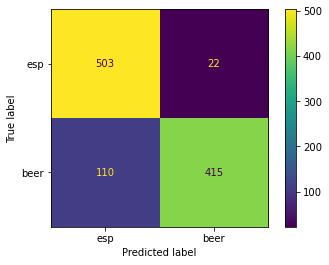

In [140]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['esp', 'beer']);

In [141]:
gs.score(X_train, y_train)

0.8780565258812322

In [142]:
gs.score(X_test, y_test)

0.8742857142857143

In [143]:
pred = gs.predict(X_test)

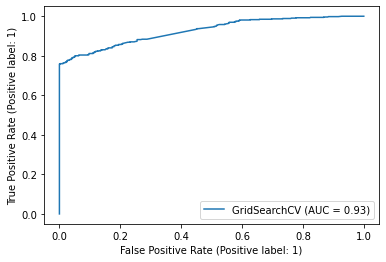

In [144]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs, X_test, y_test);

In [145]:
probs = gs.predict_proba(X_test)[:, 1]
probs

array([0.87491053, 0.9217123 , 0.3554806 , ..., 0.44732095, 0.17456431,
       0.69296434])

In [146]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       525
           1       0.95      0.79      0.86       525

    accuracy                           0.87      1050
   macro avg       0.89      0.87      0.87      1050
weighted avg       0.89      0.87      0.87      1050

